### Reading the tissue files and adding metadata from the output_pg folder tutorial

First, we import the required packages and functions

In [1]:
import pegasus as pg
import numpy as np
import pandas as pd

from config.config import *
from reading import read_tissue, get_project_info

Then you need to set the parameters down below. The project and tissue names need to be exactly as they appear in `config/read_info/projects.csv`. Method specifies from which type of QC the metadata data is taken from, and can be set to one of the following:
- 1.4-none-0
- 1.4-mad-2
- 1.4-cutoff-10
- 1.4-joint_clustering_old

In [3]:
project = "tabula_muris"
tissue = "Heart_and_Aorta"
method = "1.4-mad-2"

The code below gets the information about the tissue from projects.csv file and then reads and aggregates all the data files assosiated with the tissue using `pegasusio.aggregate_matrices`. If you want just the unfiltered files you can stop on this step.

In [4]:
is_human, annotations = get_project_info(project, tissue=tissue)
adata = read_tissue(project, tissue, annotations)   

2021-06-13 22:17:23,258 - pegasusio.text_utils - INFO - Detected mtx file in 10x v2 format.
2021-06-13 22:17:41,391 - pegasusio.readwrite - INFO - mtx file '/Volumes/scqc/data/mouse/tabula_muris/Heart_and_Aorta/Heart_and_Aorta-10X_P7_4/matrix.mtx' is loaded.
2021-06-13 22:17:41,392 - pegasusio.readwrite - INFO - Function 'read_input' finished in 23.80s.
2021-06-13 22:17:41,956 - pegasusio.aggr_data - INFO - Function 'aggregate' finished in 0.08s.
2021-06-13 22:17:43,142 - pegasusio.data_aggregation - INFO - Aggregated 1 files.
2021-06-13 22:17:43,143 - pegasusio.data_aggregation - INFO - Function 'aggregate_matrices' finished in 25.55s.


Then the metadata file is loaded using pandas. The rows are named with cell barcodes by setting `index` attribute and the `louvain_labels` is converted to categorical.

In [5]:
metadata = pd.read_csv(OUTPUT_DIR + "/" + project + "/" + tissue + "/" + method + "/!cells.csv")
metadata.index = metadata.barcodekey
metadata["louvain_labels"] = metadata.louvain_labels.astype("category")

In [6]:
metadata

,Unnamed: 0,barcodekey,Channel,annotations,n_genes,n_counts,percent_mito,percent_ribo,scale,louvain_labels,...,apoptosis3,cycling_g2m,cycling_s,dissociation,er_stress,go_mito_resp_chain_mouse,pca1,pca2,umap1,umap2
barcodekey,,,,,,,,,,,,,,,,,,,,,
Heart_and_Aorta-10X_P7_4-AAACCTGAGAGTCTGG,0,Heart_and_Aorta-10X_P7_4-AAACCTGAGAGTCTGG,Heart_and_Aorta-10X_P7_4,Unknown,133,146,1.369863,21.917808,684.931507,7,...,-0.052891,0.102061,-0.023763,0.307333,-0.057185,0.138092,-6.088926,0.773265,12.285482,7.627682
Heart_and_Aorta-10X_P7_4-AAACCTGAGCCAGTAG,1,Heart_and_Aorta-10X_P7_4-AAACCTGAGCCAGTAG,Heart_and_Aorta-10X_P7_4,Unknown,143,171,0.584795,14.619883,584.795322,1,...,0.249417,-0.028730,-0.015051,-0.440649,-0.029623,-0.061578,-3.841659,4.357838,6.567396,7.323656
Heart_and_Aorta-10X_P7_4-AAACCTGCACGACGAA,2,Heart_and_Aorta-10X_P7_4-AAACCTGCACGACGAA,Heart_and_Aorta-10X_P7_4,endothelial cell,2348,5170,0.909091,15.512573,19.346102,5,...,0.494890,-0.186256,-0.225112,-0.054121,-0.101069,-0.201446,14.297876,-10.027376,18.049875,9.205024
Heart_and_Aorta-10X_P7_4-AAACCTGGTGAGTGAC,3,Heart_and_Aorta-10X_P7_4-AAACCTGGTGAGTGAC,Heart_and_Aorta-10X_P7_4,Unknown,151,198,1.010101,33.838384,507.614213,12,...,0.254628,-0.027547,0.133036,-0.331817,-0.026724,-0.150289,-5.113489,1.971826,10.702849,7.306004
Heart_and_Aorta-10X_P7_4-AAACCTGGTTACGCGC,4,Heart_and_Aorta-10X_P7_4-AAACCTGGTTACGCGC,Heart_and_Aorta-10X_P7_4,Unknown,125,148,5.405405,10.135135,675.675676,9,...,-0.036182,-0.019646,-0.017399,0.286514,0.023356,-0.008280,-4.806446,1.985424,9.163538,4.853377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Heart_and_Aorta-10X_P7_4-TTTGTCACATGCCCGA,2581,Heart_and_Aorta-10X_P7_4-TTTGTCACATGCCCGA,Heart_and_Aorta-10X_P7_4,Unknown,109,125,1.600000,3.200000,800.000000,18,...,-0.050066,0.103029,-0.013088,0.002968,-0.050971,-0.080839,-3.932170,-2.807523,10.403267,1.390957
Heart_and_Aorta-10X_P7_4-TTTGTCAGTCGATTGT,2582,Heart_and_Aorta-10X_P7_4-TTTGTCAGTCGATTGT,Heart_and_Aorta-10X_P7_4,endothelial cell,2146,4313,1.344772,8.996058,23.196474,5,...,-0.038292,-0.044222,0.030186,0.113427,-0.006286,-0.164648,15.127359,-11.621907,17.234526,10.281384
Heart_and_Aorta-10X_P7_4-TTTGTCAGTGCGCTTG,2583,Heart_and_Aorta-10X_P7_4-TTTGTCAGTGCGCTTG,Heart_and_Aorta-10X_P7_4,fibroblast,3400,9457,1.533256,10.563604,10.585371,22,...,-0.303823,-0.173527,-0.124091,-1.011357,-0.065937,-0.099463,16.506321,-5.467303,17.210283,0.418915


Then, you can copy the observations you need to the pegasus object. Add or remove commands as needed. The general format of the command is `adata.obs["%col_name%"] = metadata["%col_name_in_metadata%"]` (%col_name% does not have to be the same as %col_name_in_metadata%)

In [7]:
adata.obs["louvain_labels"] = metadata["louvain_labels"]
adata.obs["er_stress"] = metadata["er_stress"]

You can keep only the cells that have passed the method specified by `method` variable by running filtering code below

In [8]:
adata.obs["passed_qc"] = (adata.obs.index.isin(metadata.barcodekey))
pg.filter_data(adata)

2021-06-13 22:17:46,646 - pegasusio.qc_utils - INFO - After filtration, 2586 out of 737280 cell barcodes are kept in UnimodalData object GRCm38-rna.
2021-06-13 22:17:46,647 - pegasus.tools.preprocessing - INFO - Function 'filter_data' finished in 0.09s.


You can add umap or pca coordinates if you need with the code below. Filtering step above is reqired for this step.

In [9]:
x_umap = np.array([[metadata.umap1[i], metadata.umap2[i]] for i in range(len(metadata.umap1))], dtype="float32")
adata.obsm["X_umap"] = x_umap
x_pca = np.array([[metadata.pca1[i], metadata.pca2[i]] for i in range(len(metadata.pca1))], dtype="float32")
adata.obsm["X_pca"] = x_pca

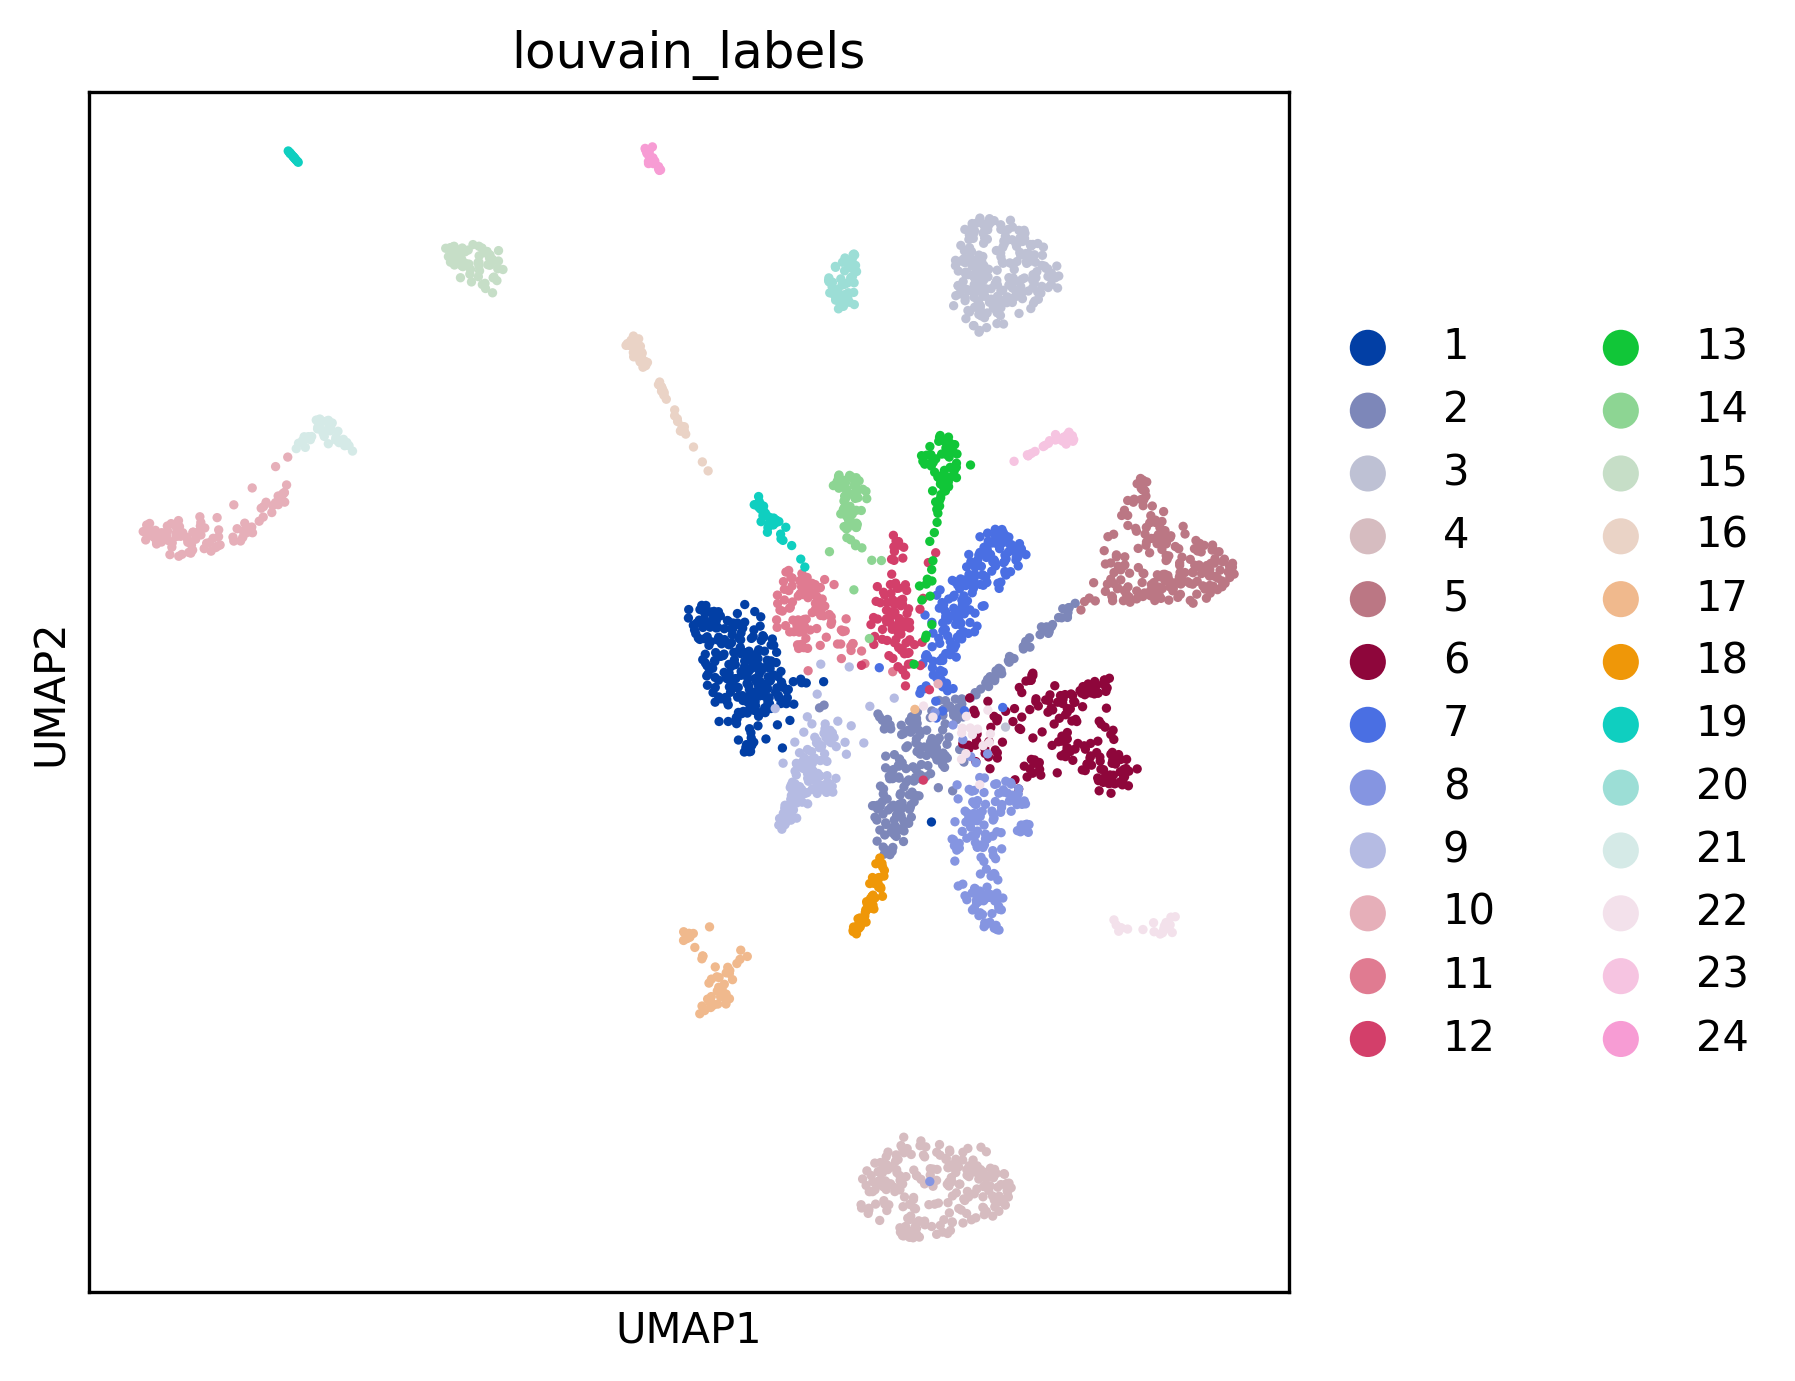

In [10]:
pg.scatter(adata, attrs="louvain_labels", basis='umap')